# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Demonstrations-of-Single-Player-Simulations-for-Non-Stationary-Bandits" data-toc-modified-id="Demonstrations-of-Single-Player-Simulations-for-Non-Stationary-Bandits-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demonstrations of Single-Player Simulations for Non-Stationary-Bandits</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Two-MAB-problems-with-Bernoulli-arms-and-piecewise-stationary-means" data-toc-modified-id="Two-MAB-problems-with-Bernoulli-arms-and-piecewise-stationary-means-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Two MAB problems with Bernoulli arms and piecewise stationary means</a></div><div class="lev3 toc-item"><a href="#Some-MAB-algorithms" data-toc-modified-id="Some-MAB-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some MAB algorithms</a></div><div class="lev4 toc-item"><a href="#Parameters-of-the-algorithms" data-toc-modified-id="Parameters-of-the-algorithms-1131"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Parameters of the algorithms</a></div><div class="lev4 toc-item"><a href="#Algorithms" data-toc-modified-id="Algorithms-1132"><span class="toc-item-num">1.1.3.2&nbsp;&nbsp;</span>Algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-Evaluator-object" data-toc-modified-id="Creating-the-Evaluator-object-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the <code>Evaluator</code> object</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev3 toc-item"><a href="#First-problem" data-toc-modified-id="First-problem-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>First problem</a></div><div class="lev3 toc-item"><a href="#Second-problem" data-toc-modified-id="Second-problem-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Second problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev3 toc-item"><a href="#First-problem-with-change-on-only-one-arm-(Local-Restart-should-be-better)" data-toc-modified-id="First-problem-with-change-on-only-one-arm-(Local-Restart-should-be-better)-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>First problem with change on only one arm (Local Restart should be better)</a></div><div class="lev3 toc-item"><a href="#Second-problem-with-changes-on-all-arms-(Global-restart-should-be-better)" data-toc-modified-id="Second-problem-with-changes-on-all-arms-(Global-restart-should-be-better)-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Second problem with changes on all arms (Global restart should be better)</a></div>

---
# Demonstrations of Single-Player Simulations for Non-Stationary-Bandits

This notebook shows how to 1) **define**, 2) **launch**, and 3) **plot the results** of numerical simulations of piecewise stationary (multi-armed) bandits problems using my framework [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits).
For more details on the maths behind this problem, see this page in the documentation: [SMPyBandits.GitHub.io/NonStationaryBandits.html](https://smpybandits.github.io/NonStationaryBandits.html).

First, be sure to be in the main folder, or to have [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits) installed, and import `Evaluator` from `Environment` package.

<span style="color:red">WARNING</span>
If you are running this notebook locally, in the [`notebooks`](https://github.com/SMPyBandits/SMPyBandits/tree/master/notebooks) folder in the [`SMPyBandits`](https://github.com/SMPyBandits/SMPyBandits/) source, you need to do:

In [3]:
import sys
sys.path.insert(0, '..')

If you are running this notebook elsewhere, `SMPyBandits` can be `pip install`ed easily:
(this is especially true if you run this notebook from Google Colab or MyBinder).

In [4]:
try:
    import SMPyBandits
except ImportError:
    !pip3 install SMPyBandits

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


Let's just check the versions of the installed modules:

In [49]:
!pip3 install watermark > /dev/null

In [50]:
%load_ext watermark
%watermark -v -m -p SMPyBandits,numpy,matplotlib -a "Lilian Besson"

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Lilian Besson 

CPython 3.6.7
IPython 7.2.0

SMPyBandits 0.9.4
numpy 1.15.4
matplotlib 3.0.2

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


We can now import all the modules we need for this demonstration.

In [8]:
import numpy as np

In [9]:
# Local imports
from SMPyBandits.Environment import Evaluator, tqdm

In [51]:
# Large figures for pretty notebooks
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (19.80, 10.80)

We also need arms, for instance `Bernoulli`-distributed arm:

In [52]:
# Import arms
from SMPyBandits.Arms import Bernoulli

And finally we need some single-player Reinforcement Learning algorithms:

In [53]:
# Import algorithms
from SMPyBandits.Policies import *

---
## Creating the problem

### Parameters for the simulation
- $T = 1000$ is the time horizon,
- $N = 50$ is the number of repetitions,
- `N_JOBS = 4` is the number of cores used to parallelize the code.

In [97]:
from multiprocessing import cpu_count
CPU_COUNT = cpu_count()
N_JOBS = CPU_COUNT if CPU_COUNT <= 4 else CPU_COUNT - 4

print(f"Using {N_JOBS} jobs in parallel...")

Using 4 jobs in parallel...


In [98]:
HORIZON = 1000
REPETITIONS = 100

print(f"Using T = {HORIZON}, and N = {REPETITIONS} repetitions")

Using T = 1000, and N = 100 repetitions


### Two MAB problems with Bernoulli arms and piecewise stationary means

We consider in this example $2$ problems, with `Bernoulli` arms, of different piecewise stationary means.

1. The first problem has changes on only one arm at every breakpoint times,
2. The second problem has changes on all arms at every breakpoint times.

In [29]:
ENVIRONMENTS = []

ENVIRONMENTS += [
    {   # A simple piece-wise stationary problem
        "arm_type": Bernoulli,
        "params": {
            "listOfMeans": [
                [0.2, 0.5, 0.9],  # 0    to 399
                [0.2, 0.2, 0.9],  # 400  to 799
                [0.2, 0.2, 0.1],  # 800  to 1199
                [0.7, 0.2, 0.1],  # 1200 to 1599
                [0.7, 0.5, 0.1],  # 1600 to end
            ],
            "changePoints": [
                int(0    * HORIZON / 2000.0),
                int(400  * HORIZON / 2000.0),
                int(800  * HORIZON / 2000.0),
                int(1200 * HORIZON / 2000.0),
                int(1600 * HORIZON / 2000.0),
                # 20000,  # XXX larger than horizon, just to see if it is a problem?
            ],
        }
    },
]

# Pb 2 changes are on all or almost arms at a time
ENVIRONMENTS += [
    {   # A simple piece-wise stationary problem
        "arm_type": Bernoulli,
        "params": {
            "listOfMeans": [
                [0.4, 0.5, 0.9],  # 0    to 399
                [0.5, 0.4, 0.7],  # 400  to 799
                [0.6, 0.3, 0.5],  # 800  to 1199
                [0.7, 0.2, 0.3],  # 1200 to 1599
                [0.8, 0.1, 0.1],  # 1600 to end
            ],
            "changePoints": [
                int(0    * HORIZON / 2000.0),
                int(400  * HORIZON / 2000.0),
                int(800  * HORIZON / 2000.0),
                int(1200 * HORIZON / 2000.0),
                int(1600 * HORIZON / 2000.0),
                # 20000,  # XXX larger than horizon, just to see if it is a problem?
            ],
        }
    },
]

list_nb_arms = [len(env["params"]["listOfMeans"][0]) for env in ENVIRONMENTS]
NB_ARMS = max(list_nb_arms)
assert all(n == NB_ARMS for n in list_nb_arms), "Error: it is NOT supported to have successive problems with a different number of arms!"
print(f"==> Using K = {NB_ARMS} arms")

NB_BREAK_POINTS = max(len(env["params"]["changePoints"]) for env in ENVIRONMENTS)
print(f"==> Using Upsilon_T = {NB_BREAK_POINTS} change points")

CHANGE_POINTS = np.unique(np.array(list(set.union(*(set(env["params"]["changePoints"]) for env in ENVIRONMENTS)))))
print(f"==> Using the following {list(CHANGE_POINTS)} change points")

==> Using K = 3 arms
==> Using Upsilon_T = 5 change points
==> Using the following [0, 200, 400, 600, 800] change points


### Some MAB algorithms

We want compare some classical MAB algorithms ($\mathrm{UCB}_1$, Thompson Sampling and $\mathrm{kl}$-$\mathrm{UCB}$) that are designed to solve stationary problems against other algorithms designed to solve piecewise-stationary problems.

#### Parameters of the algorithms

In [30]:
klucb = klucb_mapping.get(str(ENVIRONMENTS[0]['arm_type']), klucbBern)
klucb

<function SMPyBandits.Policies.kullback.klucbBern>

In [31]:
EPSS   = [0.1, 0.05]

ALPHAS = [1]

TAUS   = [
        500, 1000, 2000,
        int(2 * np.sqrt(HORIZON * np.log(HORIZON) / (1 + NB_BREAK_POINTS))),  # "optimal" value according to [Garivier & Moulines, 2008]
    ]

GAMMAS = [
        0.2, 0.4, 0.6, 0.8,
        0.95, 0.99,
        max(min(1, (1 - np.sqrt((1 + NB_BREAK_POINTS) / HORIZON)) / 4.), 0),  # "optimal" value according to [Garivier & Moulines, 2008]
    ]

WINDOW_SIZE = 800 if HORIZON >= 10000 else 80

#### Algorithms

In [32]:
POLICIES = [  # XXX Regular adversarial bandits algorithms!
        { "archtype": Exp3PlusPlus, "params": {} },
    ] + [  # XXX Regular stochastic bandits algorithms!
        { "archtype": UCBalpha, "params": { "alpha": 1, } },
        { "archtype": klUCB, "params": { "klucb": klucb, } },
        { "archtype": Thompson, "params": { "posterior": Beta, } },
    ] + [  # XXX This is still highly experimental!
        { "archtype": DiscountedThompson, "params": { "posterior": DiscountedBeta, "gamma": gamma } }
        # for gamma in GAMMAS
        for gamma in [0.99, 0.9, 0.7]
    ] + [  # --- The Exp3R algorithm works reasonably well
        { "archtype": Exp3R, "params": { "horizon": HORIZON, } }
    ] + [  # --- XXX The Exp3RPlusPlus variant of Exp3R algorithm works also reasonably well
        { "archtype": Exp3RPlusPlus, "params": { "horizon": HORIZON, } }
    ] + [  # --- XXX Test a few CD-MAB algorithms that need to know NB_BREAK_POINTS
        { "archtype": archtype, "params": {
            "horizon": HORIZON,
            "max_nb_random_events": NB_BREAK_POINTS,
            "policy": policy,
            "per_arm_restart": per_arm_restart,
        } }
        for archtype in [
            CUSUM_IndexPolicy,
            PHT_IndexPolicy,  # OK PHT_IndexPolicy is very much like CUSUM
        ]
        for policy in [
            # UCB,  # XXX comment to only test klUCB
            klUCB,
        ]
        for per_arm_restart in [
            True,  # Per-arm restart XXX comment to only test global arm
            False, # Global restart XXX seems more efficient? (at least more memory efficient!)
        ]
    ] + [  # --- XXX Test a few CD-MAB algorithms
        { "archtype": archtype, "params": {
            "horizon": HORIZON,
            "policy": policy,
            "per_arm_restart": per_arm_restart,
        } }
        for archtype in [
            BernoulliGLR_IndexPolicy,  # OK BernoulliGLR_IndexPolicy is very much like CUSUM
            GaussianGLR_IndexPolicy,  # OK GaussianGLR_IndexPolicy is very much like Bernoulli GLR
            SubGaussianGLR_IndexPolicy, # OK SubGaussianGLR_IndexPolicy is very much like Gaussian GLR
        ]
        for policy in [
            # UCB,  # XXX comment to only test klUCB
            klUCB,
        ]
        for per_arm_restart in [
            True,  # Per-arm restart XXX comment to only test global arm
            False, # Global restart XXX seems more efficient? (at least more memory efficient!)
        ]
    ] + [  # --- XXX The Monitored_IndexPolicy with specific tuning of the input parameters
        { "archtype": Monitored_IndexPolicy, "params": { "horizon": HORIZON, "w": WINDOW_SIZE, "b": np.sqrt(WINDOW_SIZE/2 * np.log(2 * NB_ARMS * HORIZON**2)), "policy": policy, "per_arm_restart": per_arm_restart, } }
        for per_arm_restart in [
            True,  # Per-arm restart XXX comment to only test global arm
            False, # Global restart XXX seems more efficient? (at least more memory efficient!)
        ]
        for policy in [
            # UCB,
            klUCB,  # XXX comment to only test UCB
        ]
    ] + [  # --- DONE The SW_UCB_Hash algorithm works fine!
        { "archtype": SWHash_IndexPolicy, "params": { "alpha": alpha, "lmbda": lmbda, "policy": UCB } }
        for alpha in ALPHAS
        for lmbda in [1]  # [0.1, 0.5, 1, 5, 10]
    ] + [ # --- # XXX experimental other version of the sliding window algorithm, knowing the horizon
        { "archtype": SWUCBPlus, "params": { "horizon": HORIZON, "alpha": alpha, } }
        for alpha in ALPHAS
    ] + [ # --- # XXX experimental discounted UCB algorithm, knowing the horizon
        { "archtype": DiscountedUCBPlus, "params": { "max_nb_random_events": max_nb_random_events, "alpha": alpha, "horizon": HORIZON, } }
        for alpha in ALPHAS
        for max_nb_random_events in [NB_BREAK_POINTS]
    ] + [  # --- DONE the OracleSequentiallyRestartPolicy with klUCB/UCB policy works quite well, but NOT optimally!
        { "archtype": OracleSequentiallyRestartPolicy, "params": { "changePoints": CHANGE_POINTS, "policy": policy,
            "per_arm_restart": per_arm_restart,
            # "full_restart_when_refresh": full_restart_when_refresh,
        } }
        for policy in [
            UCB,
            klUCB,  # XXX comment to only test UCB
            Exp3PlusPlus,  # XXX comment to only test UCB
        ]
        for per_arm_restart in [True]  #, False]
        # for full_restart_when_refresh in [True, False]
    ]

The complete configuration for the problems and these algorithms is then a simple dictionary:

In [33]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
    # --- Random events
    "nb_break_points": NB_BREAK_POINTS,
    # --- Should we plot the lower-bounds or not?
    "plot_lowerbound": False,  # XXX Default
    # --- Cache rewards: use the same random rewards for all algorithms (more fair comparison!)
    "cache_rewards": True,
}

configuration

{'horizon': 1000,
 'repetitions': 5,
 'n_jobs': 4,
 'verbosity': 6,
 'environment': [{'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': {'listOfMeans': [[0.2, 0.5, 0.9],
     [0.2, 0.2, 0.9],
     [0.2, 0.2, 0.1],
     [0.7, 0.2, 0.1],
     [0.7, 0.5, 0.1]],
    'changePoints': [0, 200, 400, 600, 800]}},
  {'arm_type': SMPyBandits.Arms.Bernoulli.Bernoulli,
   'params': {'listOfMeans': [[0.4, 0.5, 0.9],
     [0.5, 0.4, 0.7],
     [0.6, 0.3, 0.5],
     [0.7, 0.2, 0.3],
     [0.8, 0.1, 0.1]],
    'changePoints': [0, 200, 400, 600, 800]}}],
 'policies': [{'archtype': SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus,
   'params': {}},
  {'archtype': SMPyBandits.Policies.UCBalpha.UCBalpha, 'params': {'alpha': 1}},
  {'archtype': SMPyBandits.Policies.klUCB.klUCB,
   'params': {'klucb': <function SMPyBandits.Policies.kullback.klucbBern>}},
  {'archtype': SMPyBandits.Policies.Thompson.Thompson,
   'params': {'posterior': SMPyBandits.Policies.Posterior.Beta.Beta}},
  {'archtype': SMPy

In [70]:
# (almost) unique hash from the configuration
hashvalue = abs(hash((tuple(configuration.keys()), tuple([(len(k) if isinstance(k, (dict, tuple, list)) else k) for k in configuration.values()]))))
print(f"This configuraiton has a hash value = {hashvalue}")

This configuraiton has a hash value = 7571996308312636839


In [77]:
import os, os.path

In [79]:
subfolder = "SP__K{}_T{}_N{}__{}_algos".format(env.nbArms, configuration['horizon'], configuration['repetitions'], len(configuration['policies']))
PLOT_DIR = "plots"
plot_dir = os.path.join(PLOT_DIR, subfolder)

# Create the sub folder
if os.path.isdir(plot_dir):
    print("{} is already a directory here...".format(plot_dir))
elif os.path.isfile(plot_dir):
    raise ValueError("[ERROR] {} is a file, cannot use it as a directory !".format(plot_dir))
else:
    os.mkdir(plot_dir)

print(f"Using sub folder = '{subfolder}' and plotting in '{plot_dir}'...")

plots/SP__K3_T1000_N5__27_algos is already a directory here...
Using sub folder = 'SP__K3_T1000_N5__27_algos' and plotting in 'plots/SP__K3_T1000_N5__27_algos'...


In [83]:
mainfig = os.path.join(plot_dir, "main")
print(f"Using main figure name as '{mainfig}_{hashvalue}'...")

Using main figure name as 'plots/SP__K3_T1000_N5__27_algos/main_7571996308312636839'...


---
## Creating the `Evaluator` object

In [34]:
evaluation = Evaluator(configuration)

Number of policies in this comparison: 27
Time horizon: 1000
Number of repetitions: 5
Sampling rate for plotting, delta_t_plot: 1
Number of jobs for parallelization: 4
Using this dictionary to create a new environment:
 {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': {'listOfMeans': [[0.2, 0.5, 0.9], [0.2, 0.2, 0.9], [0.2, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 200, 400, 600, 800]}}
  Special MAB problem, with arm (possibly) changing at every time step, read from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': {'listOfMeans': [[0.2, 0.5, 0.9], [0.2, 0.2, 0.9], [0.2, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 200, 400, 600, 800]}} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = {'listOfMeans': [[0.2, 0.5, 0.9], [0.2, 0.2, 0.9], [0.2, 0.2, 0.1], [0.7, 0.2, 0.1], [0.7, 0.5, 0.1]], 'changePoints': [0, 200, 400, 600, 800]}

##  Solving the problem
Now we can simulate all the environments.

<span style="color:red">WARNING</span>
That part takes some time, most stationary algorithms run with a time complexity linear in the horizon (ie., time takes $\mathcal{O}(T)$) and most piecewise stationary algorithms run with a time complexity **square** in the horizon (ie., time takes $\mathcal{O}(T^2)$).

### First problem

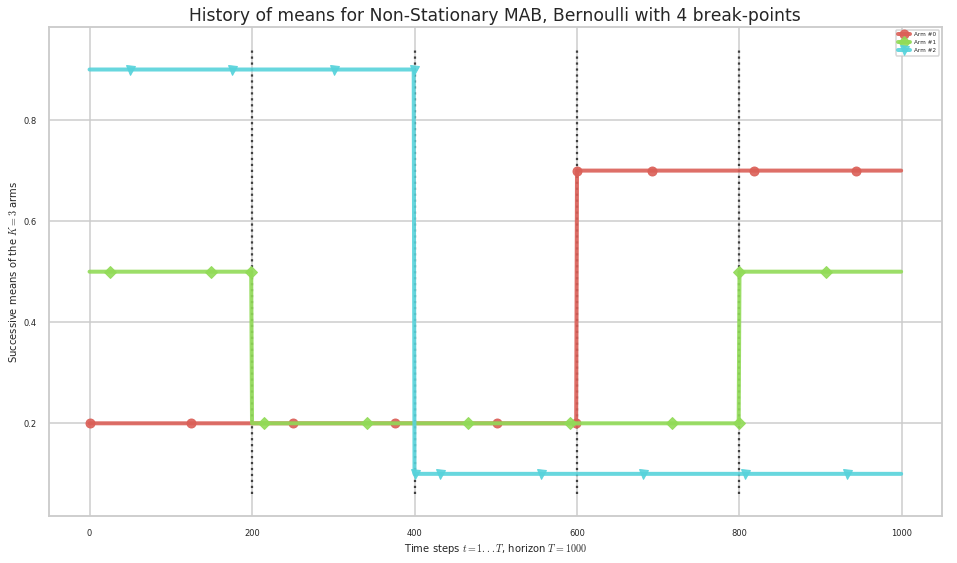

CPU times: user 528 ms, sys: 332 ms, total: 860 ms
Wall time: 472 ms


Evaluating environment: PieceWiseStationaryMAB(nbArms: 3, arms: [B(0.2), B(0.5), B(0.9)])
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
- Adding policy #3 = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in functi




- Evaluating policy #1/27: Exp3++ ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    2.9s remaining:    1.9s





- Evaluating policy #2/27: UCB($\alpha=1$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished





- Evaluating policy #3/27: kl-UCB ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #4/27: Thompson ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s





- Evaluating policy #5/27: DiscountedThompson($\gamma=0.99$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s





- Evaluating policy #6/27: DiscountedThompson($\gamma=0.9$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished





- Evaluating policy #7/27: DiscountedThompson($\gamma=0.7$) ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished





- Evaluating policy #8/27: Exp3R($T=1000$, $c=4.66$, $\alpha=0.01$) ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.8s remaining:    0.5s





- Evaluating policy #9/27: Exp3R++($T=1000$, $c=0.847$, $\alpha=0.303$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.9s remaining:    0.6s





- Evaluating policy #10/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    2.1s remaining:    1.4s





- Evaluating policy #11/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    2.4s remaining:    1.6s





- Evaluating policy #12/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.8s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    4.6s remaining:    3.1s





- Evaluating policy #13/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.6s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    4.1s remaining:    2.8s





- Evaluating policy #14/27: BernoulliGLR-klUCB(Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   12.1s remaining:   18.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   12.2s remaining:    8.1s





- Evaluating policy #15/27: BernoulliGLR-klUCB(Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   19.7s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   14.7s remaining:   22.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   15.5s remaining:   10.3s





- Evaluating policy #16/27: GaussianGLR-klUCB(Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   20.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   20.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   15.1s remaining:   22.6s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   15.4s remaining:   10.2s





- Evaluating policy #17/27: GaussianGLR-klUCB(Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   20.7s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   13.9s remaining:   20.9s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   14.2s remaining:    9.5s





- Evaluating policy #18/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   21.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   21.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   11.0s remaining:    7.3s





- Evaluating policy #19/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   13.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    3.8s remaining:    2.5s





- Evaluating policy #20/27: M-klUCB($w=80$, $b=24.9858$, $\gamma=0.00662$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.6s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #21/27: M-klUCB($w=80$, $b=24.9858$, $\gamma=0.00662$, Global) ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #22/27: SW-UCB#($\lambda=1$, $\alpha=1$) ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.9s remaining:    0.6s





- Evaluating policy #23/27: SW-UCB+($\tau=332$, $\alpha=1$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s





- Evaluating policy #24/27: D-UCB+($\alpha=1$, $\gamma=0.98232$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s





- Evaluating policy #25/27: OracleRestart-UCB($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished





- Evaluating policy #26/27: OracleRestart-klUCB($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s





- Evaluating policy #27/27: OracleRestart-Exp3PlusPlus($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.6s remaining:    0.4s


CPU times: user 1.58 s, sys: 102 ms, total: 1.68 s
Wall time: 2min 10s
CPU times: user 2.11 s, sys: 435 ms, total: 2.54 s
Wall time: 2min 10s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.9s finished


In [35]:
%%time
envId = 0
env = evaluation.envs[envId]
# Show the problem
%time evaluation.plotHistoryOfMeans(envId)
# Evaluate just that env
%time evaluation.startOneEnv(envId, env)

### Second problem

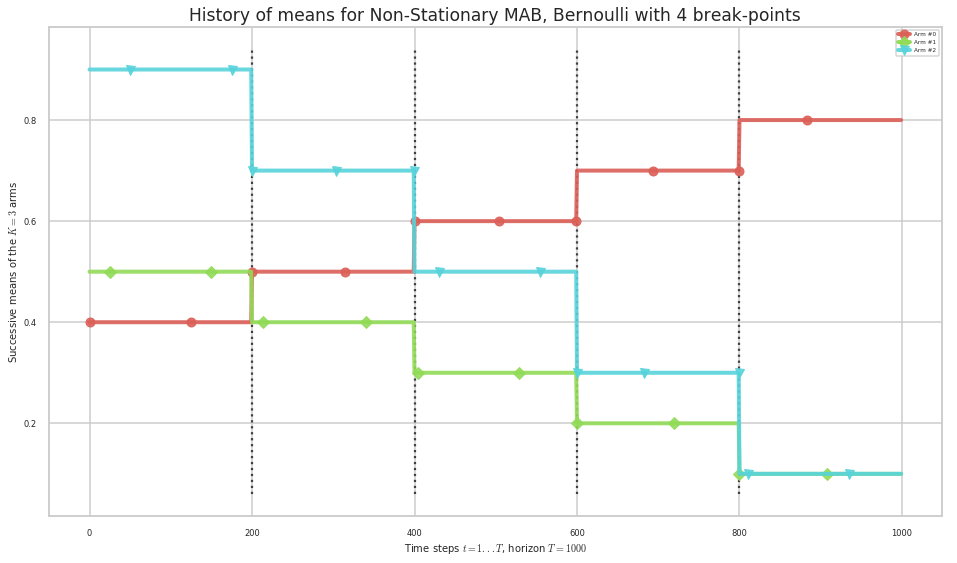

CPU times: user 526 ms, sys: 390 ms, total: 916 ms
Wall time: 466 ms


Evaluating environment: PieceWiseStationaryMAB(nbArms: 3, arms: [B(0.4), B(0.5), B(0.9)])
- Adding policy #1 = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'SMPyBandits.Policies.Exp3PlusPlus.Exp3PlusPlus'>, 'params': {}} ...
- Adding policy #2 = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][1]' = {'archtype': <class 'SMPyBandits.Policies.UCBalpha.UCBalpha'>, 'params': {'alpha': 1}} ...
- Adding policy #3 = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in function klucbBern>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][2]' = {'archtype': <class 'SMPyBandits.Policies.klUCB.klUCB'>, 'params': {'klucb': <built-in functi




- Evaluating policy #1/27: Exp3++ ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.5s remaining:    0.3s





- Evaluating policy #2/27: UCB($\alpha=1$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.6s finished





- Evaluating policy #3/27: kl-UCB ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s





- Evaluating policy #4/27: Thompson ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished





- Evaluating policy #5/27: DiscountedThompson($\gamma=0.99$) ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #6/27: DiscountedThompson($\gamma=0.9$) ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #7/27: DiscountedThompson($\gamma=0.7$) ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s





- Evaluating policy #8/27: Exp3R($T=1000$, $c=4.66$, $\alpha=0.01$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.7s remaining:    0.5s





- Evaluating policy #9/27: Exp3R++($T=1000$, $c=0.847$, $\alpha=0.303$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.0s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.9s remaining:    0.6s





- Evaluating policy #10/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    2.2s remaining:    1.5s





- Evaluating policy #11/27: CUSUM-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.1s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    2.1s remaining:    1.4s





- Evaluating policy #12/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.5s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    3.1s remaining:    2.1s





- Evaluating policy #13/27: PHT-klUCB($\varepsilon=0.5$, $\Upsilon_T=5$, $M=100$, Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    4.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    3.5s remaining:    5.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    3.6s remaining:    2.4s





- Evaluating policy #14/27: BernoulliGLR-klUCB(Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   11.9s remaining:   17.9s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   12.1s remaining:    8.1s





- Evaluating policy #15/27: BernoulliGLR-klUCB(Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   18.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   18.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   10.4s remaining:   15.6s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   10.4s remaining:    6.9s





- Evaluating policy #16/27: GaussianGLR-klUCB(Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   15.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:   10.9s remaining:    7.2s





- Evaluating policy #17/27: GaussianGLR-klUCB(Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   16.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   16.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    9.6s remaining:   14.4s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    9.6s remaining:    6.4s





- Evaluating policy #18/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   14.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   14.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    5.2s remaining:    3.5s





- Evaluating policy #19/27: SubGaussian-GLR-klUCB($\delta=0.001$, $\sigma=0.25$, joint, Global) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    9.1s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    2.7s remaining:    1.8s





- Evaluating policy #20/27: M-klUCB($w=80$, $b=24.9858$, $\gamma=0.00662$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.5s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #21/27: M-klUCB($w=80$, $b=24.9858$, $\gamma=0.00662$, Global) ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.





- Evaluating policy #22/27: SW-UCB#($\lambda=1$, $\alpha=1$) ...


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.9s remaining:    0.6s





- Evaluating policy #23/27: SW-UCB+($\tau=332$, $\alpha=1$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.4s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s





- Evaluating policy #24/27: D-UCB+($\alpha=1$, $\gamma=0.98232$) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished





- Evaluating policy #25/27: OracleRestart-UCB($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.1s remaining:    0.1s





- Evaluating policy #26/27: OracleRestart-klUCB($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.2s remaining:    0.1s





- Evaluating policy #27/27: OracleRestart-Exp3PlusPlus($\Upsilon_T=4$, Per-Arm) ...


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:    0.5s remaining:    0.3s


CPU times: user 1.07 s, sys: 88.3 ms, total: 1.16 s
Wall time: 1min 42s
CPU times: user 1.6 s, sys: 479 ms, total: 2.08 s
Wall time: 1min 43s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.7s finished


In [36]:
%%time
envId = 1
env = evaluation.envs[envId]
# Show the problem
%time evaluation.plotHistoryOfMeans(envId)
# Evaluate just that env
%time evaluation.startOneEnv(envId, env)

## Plotting the results
And finally, visualize them, with the plotting method of a `Evaluator` object:

In [37]:
def printAll(evaluation, envId):
    print("\nGiving the vector of final regrets ...")
    evaluation.printLastRegrets(envId)
    print("\nGiving the final ranks ...")
    evaluation.printFinalRanking(envId)
    print("\nGiving the mean and std running times ...")
    evaluation.printRunningTimes(envId)
    print("\nGiving the mean and std memory consumption ...")
    evaluation.printMemoryConsumption(envId)

In [89]:
def plotAll(evaluation, envId, mainfig=None):
    savefig = mainfig
    if savefig is not None: savefig = f"{mainfig}__LastRegrets__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting a boxplot of the final regrets ...")
    evaluation.plotLastRegrets(envId, boxplot=True, savefig=savefig)

    if savefig is not None: savefig = f"{mainfig}__RunningTimes__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting the mean and std running times ...")
    evaluation.plotRunningTimes(envId, savefig=savefig)

    if savefig is not None: savefig = f"{mainfig}__MemoryConsumption__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting the mean and std memory consumption ...")
    evaluation.plotMemoryConsumption(envId, savefig=savefig)

    if savefig is not None: savefig = f"{mainfig}__Regrets__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting the mean regrets ...")
    evaluation.plotRegrets(envId, savefig=savefig)

    if savefig is not None: savefig = f"{mainfig}__MeanReward__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting the mean rewards ...")
    evaluation.plotRegrets(envId, meanReward=True, savefig=savefig)

    if savefig is not None: savefig = f"{mainfig}__BestArmPulls__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting the best arm pulls ...")
    evaluation.plotBestArmPulls(envId, savefig=savefig)

    if savefig is not None: savefig = f"{mainfig}__LastRegrets__env{envId+1}-{len(evaluation.envs)}"
    print("\nPlotting an histogram of the final regrets ...")
    evaluation.plotLastRegrets(envId, subplots=True, sharex=True, sharey=False, savefig=savefig)

In [65]:
evaluation.nb_break_points

5

### First problem with change on only one arm (Local Restart should be better)

Let's first print the results then plot them:

In [84]:
envId = 0

Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env1-2.png' created of size '47789b', at 'Tue Dec 18 16:10:43 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env1-2.pdf' created of size '23068b', at 'Tue Dec 18 16:10:43 2018' ...


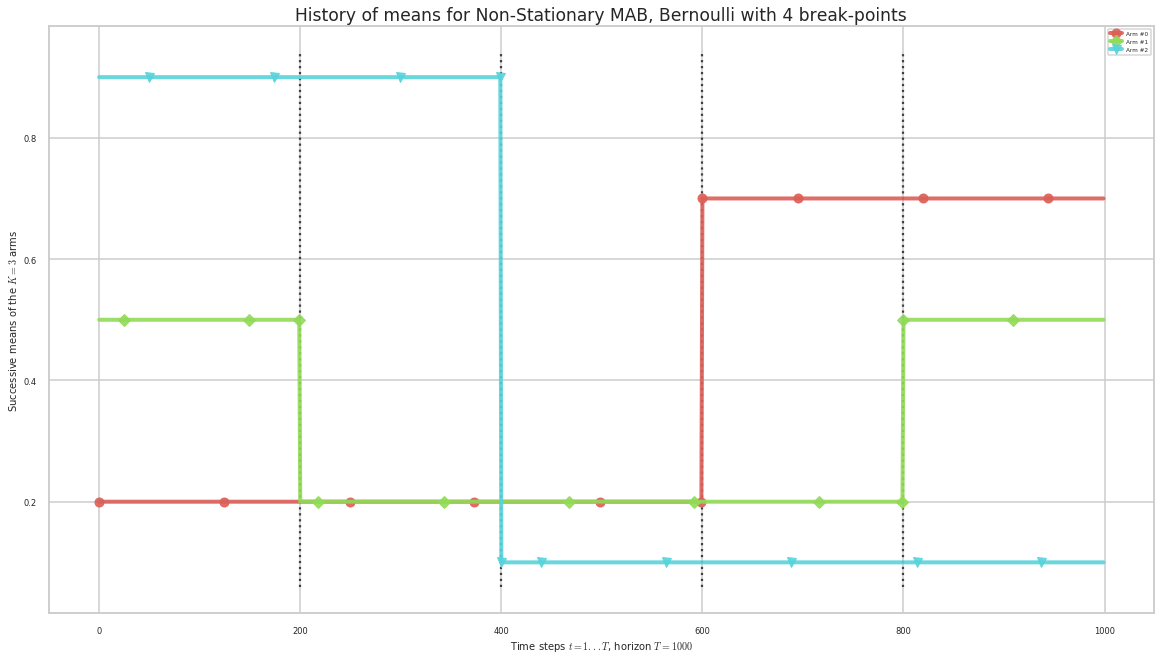

In [85]:
_ = evaluation.plotHistoryOfMeans(envId, savefig=f"{mainfig}__HistoryOfMeans__env{envId+1}-{len(evaluation.envs)}")

In [42]:
_ = printAll(evaluation, envId)


Giving the vector of final regrets ...

  For policy #0 called 'Exp3++' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 319
Mean of   last regrets R_T = 319
Median of last regrets R_T = 319
Max of    last regrets R_T = 319
STD of    last regrets R_T = 0

  For policy #1 called 'UCB($\alpha=1$)' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 270
Mean of   last regrets R_T = 270
Median of last regrets R_T = 270
Max of    last regrets R_T = 270
STD of    last regrets R_T = 0

  For policy #2 called 'kl-UCB' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 267
Mean of   last regrets R_T = 267
Median of last regrets R_T = 267
Max of    last regrets R_T = 267
STD of    last regrets R_T = 0

  For policy #3 called 'Thompson' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 265
Mean of   last regrets R_T = 265
Median of last regrets R_T = 265
Max of    last regrets R_T = 265
STD of  


Plotting a boxplot of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.png' created of size '70193b', at 'Tue Dec 18 16:12:00 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.pdf' created of size '47150b', at 'Tue Dec 18 16:12:00 2018' ...


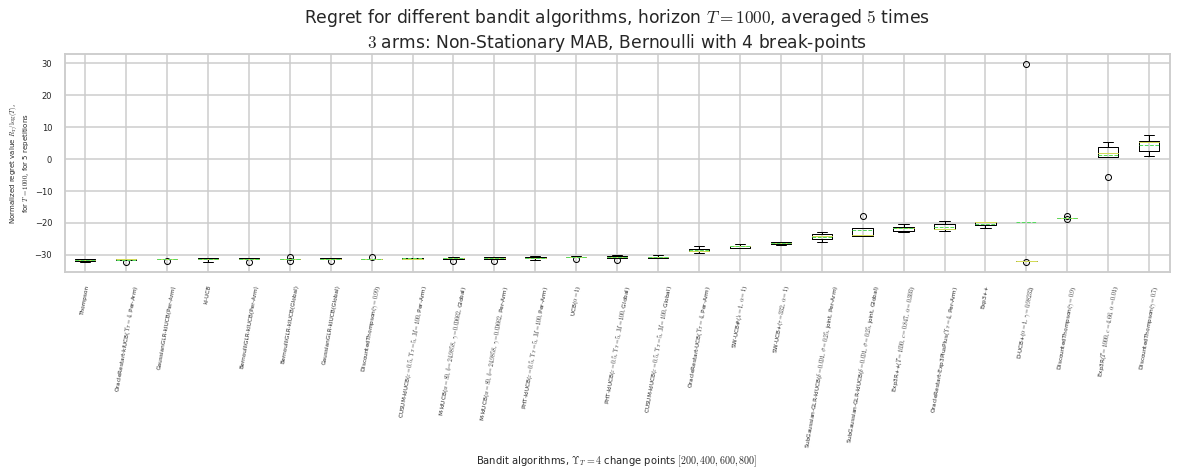


Plotting the mean and std running times ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env1-2.png' created of size '69496b', at 'Tue Dec 18 16:12:03 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env1-2.pdf' created of size '44813b', at 'Tue Dec 18 16:12:03 2018' ...


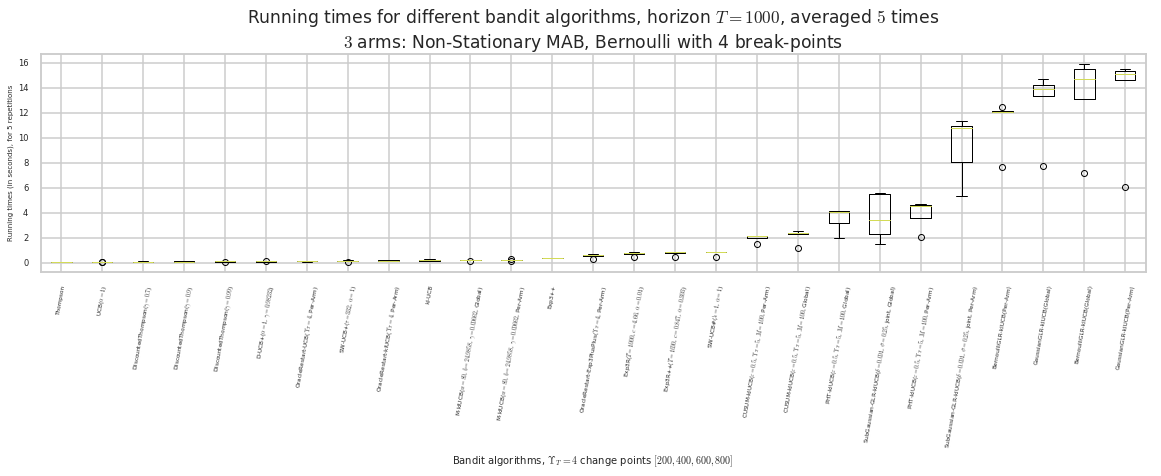


Plotting the mean and std memory consumption ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env1-2.png' created of size '69547b', at 'Tue Dec 18 16:12:05 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env1-2.pdf' created of size '42330b', at 'Tue Dec 18 16:12:05 2018' ...


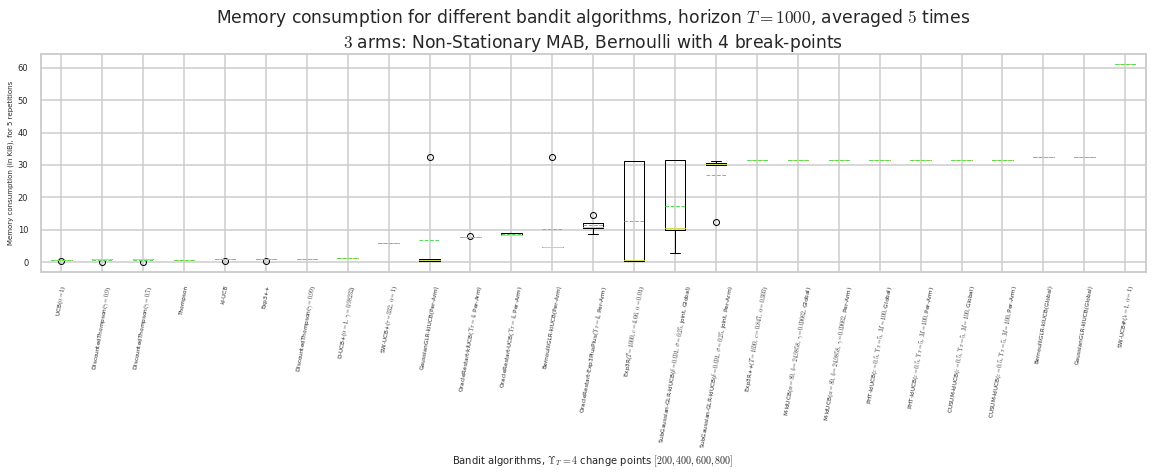


Plotting the mean regrets ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 30.00% ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env1-2.png' created of size '200649b', at 'Tue Dec 18 16:12:08 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env1-2.pdf' created of size '100277b', at 'Tue Dec 18 16:12:08 2018' ...


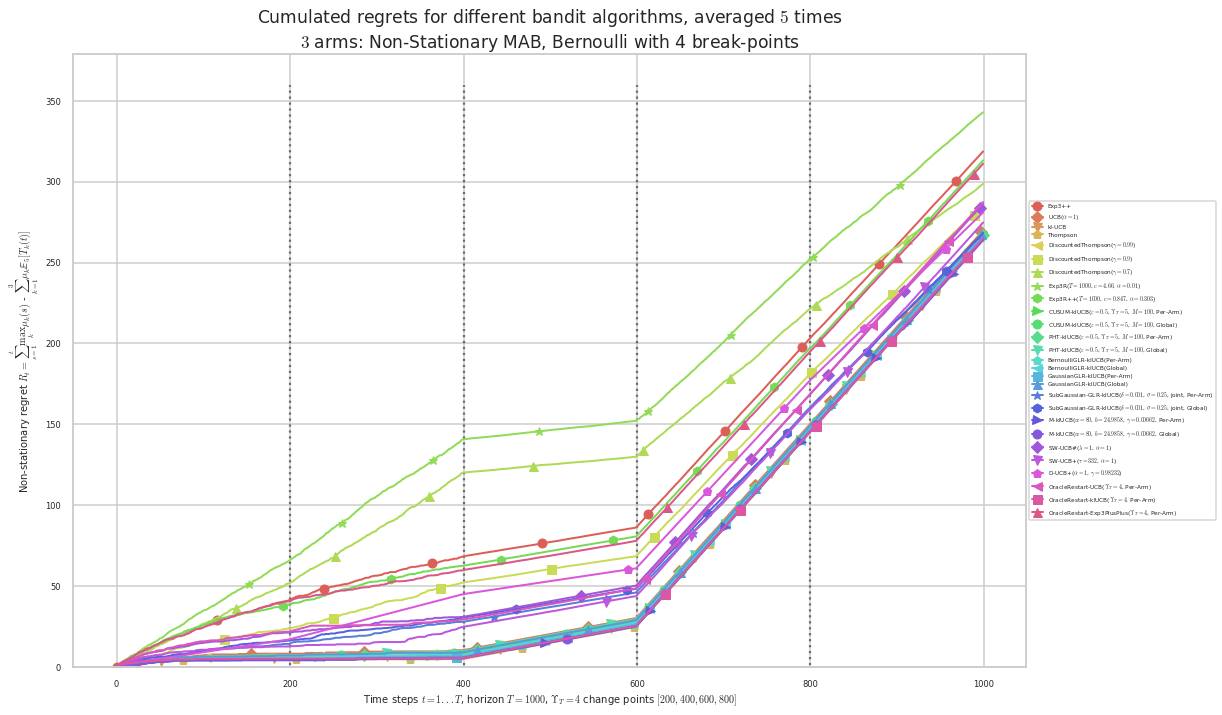


Plotting the mean rewards ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.3 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 30.00% ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env1-2.png' created of size '195894b', at 'Tue Dec 18 16:12:11 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env1-2.pdf' created of size '186009b', at 'Tue Dec 18 16:12:11 2018' ...


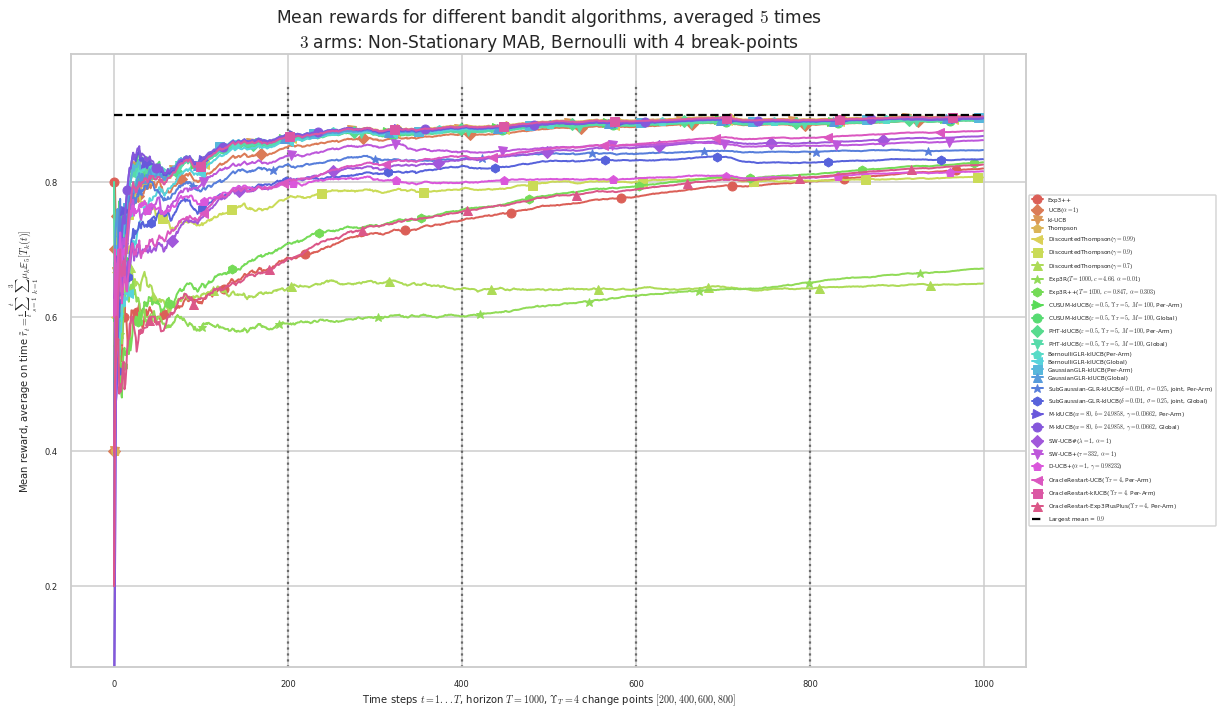


Plotting the best arm pulls ...


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env1-2.png' created of size '234170b', at 'Tue Dec 18 16:12:14 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env1-2.pdf' created of size '111393b', at 'Tue Dec 18 16:12:14 2018' ...


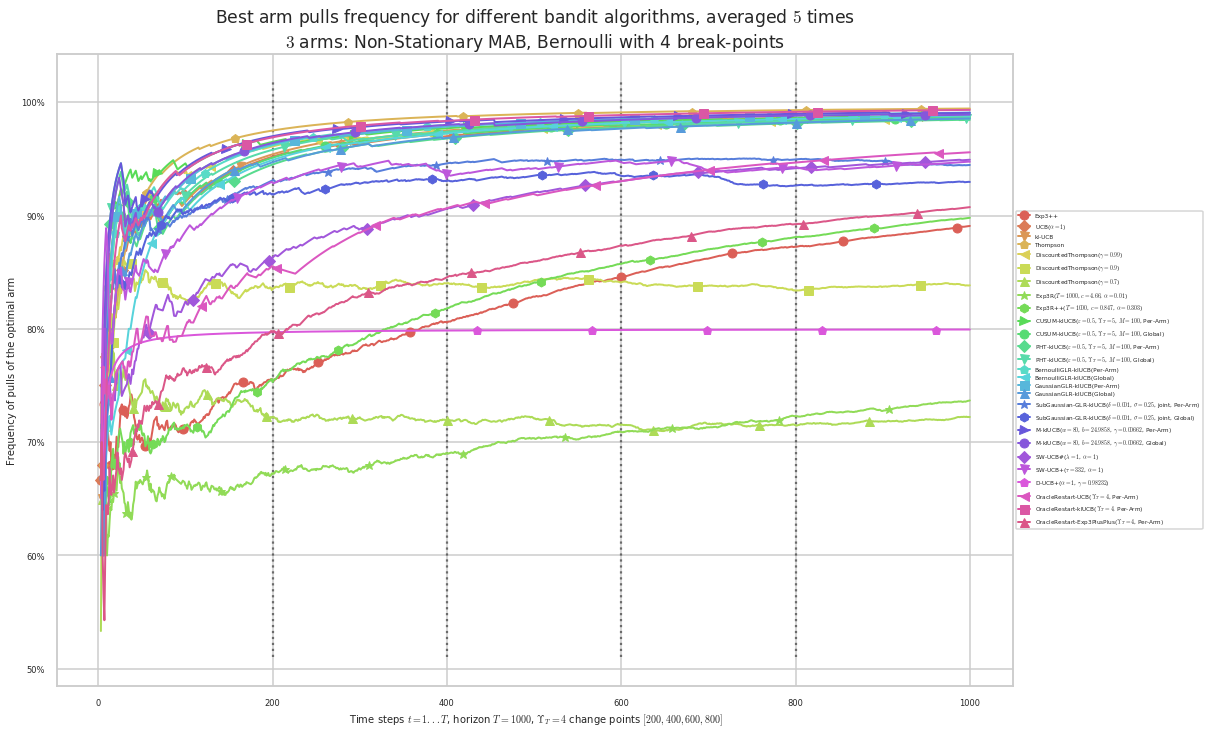


Plotting an histogram of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.png' created of size '62005b', at 'Tue Dec 18 16:12:03 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env1-2.pdf' created of size '70127b', at 'Tue Dec 18 16:12:03 2018' ...


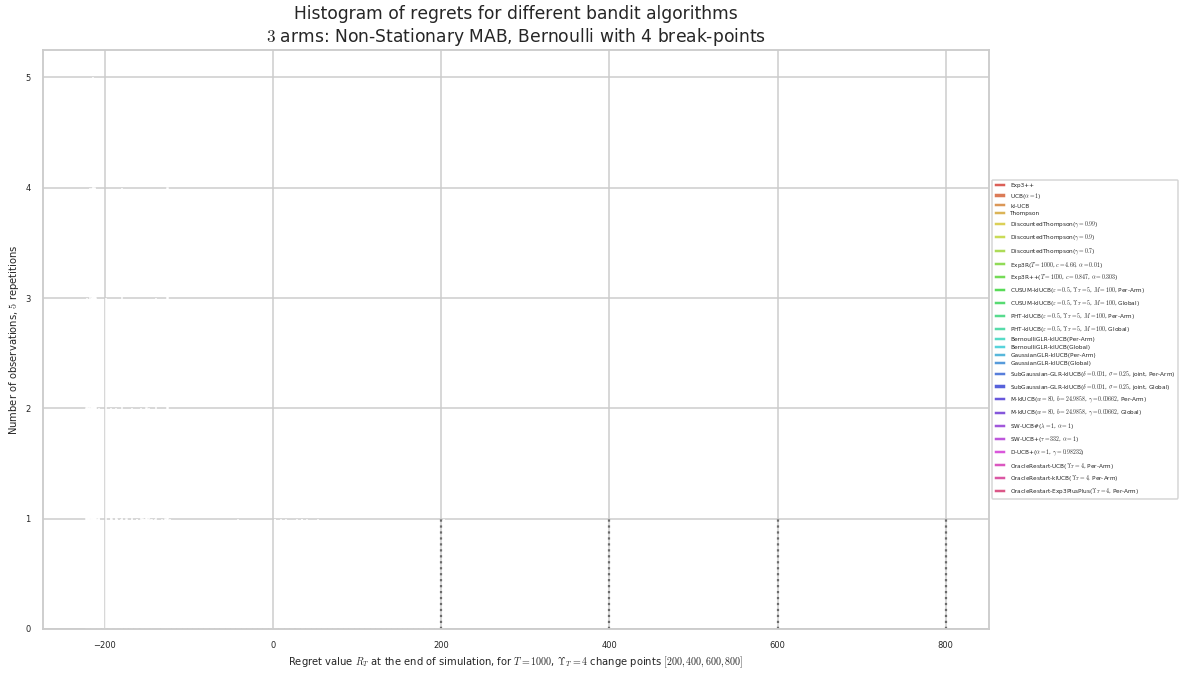

In [88]:
_ = plotAll(evaluation, envId, mainfig=mainfig)

### Second problem with changes on all arms (Global restart should be better)

Let's first print the results then plot them:

In [90]:
envId = 1

Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env2-2.png' created of size '50312b', at 'Tue Dec 18 16:13:03 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__HistoryOfMeans__env2-2.pdf' created of size '23204b', at 'Tue Dec 18 16:13:03 2018' ...


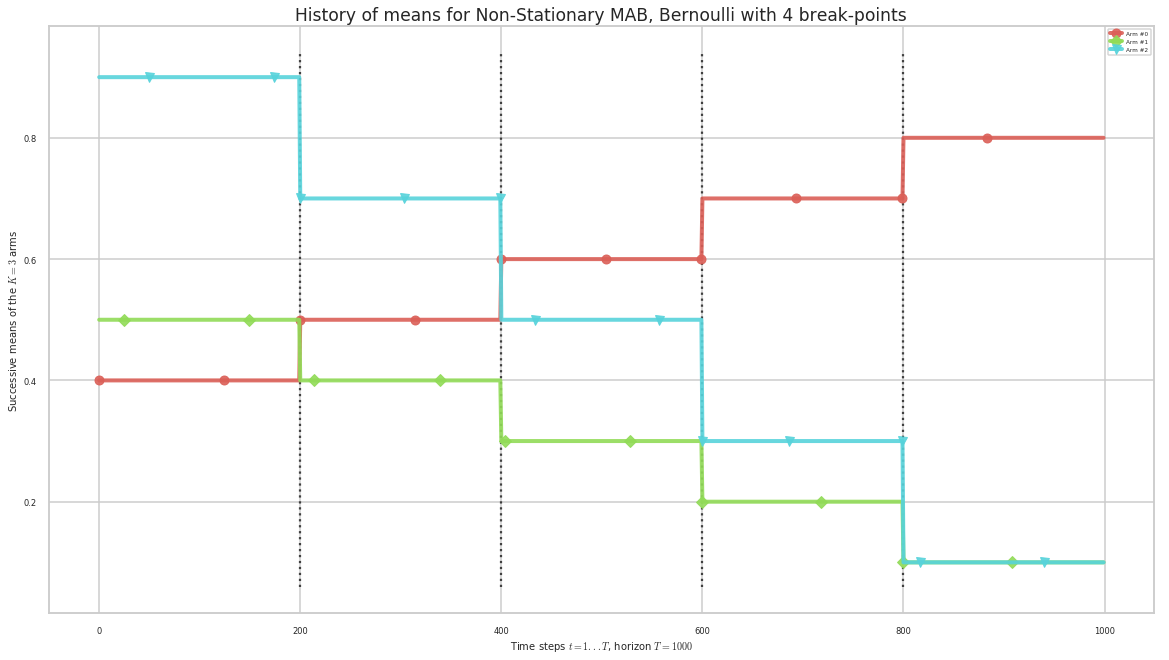

In [91]:
_ = evaluation.plotHistoryOfMeans(envId, savefig=f"{mainfig}__HistoryOfMeans__env{envId+1}-{len(evaluation.envs)}")

In [92]:
_ = printAll(evaluation, envId)


Giving the vector of final regrets ...

  For policy #0 called 'Exp3++' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 284
Mean of   last regrets R_T = 284
Median of last regrets R_T = 284
Max of    last regrets R_T = 284
STD of    last regrets R_T = 0

  For policy #1 called 'UCB($\alpha=1$)' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 250
Mean of   last regrets R_T = 250
Median of last regrets R_T = 250
Max of    last regrets R_T = 250
STD of    last regrets R_T = 0

  For policy #2 called 'kl-UCB' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 247
Mean of   last regrets R_T = 247
Median of last regrets R_T = 247
Max of    last regrets R_T = 247
STD of    last regrets R_T = 0

  For policy #3 called 'Thompson' ...
  Last regrets (for all repetitions) have:
Min of    last regrets R_T = 244
Mean of   last regrets R_T = 244
Median of last regrets R_T = 244
Max of    last regrets R_T = 244
STD of  


Plotting a boxplot of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.png' created of size '70474b', at 'Tue Dec 18 16:13:11 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.pdf' created of size '48579b', at 'Tue Dec 18 16:13:11 2018' ...


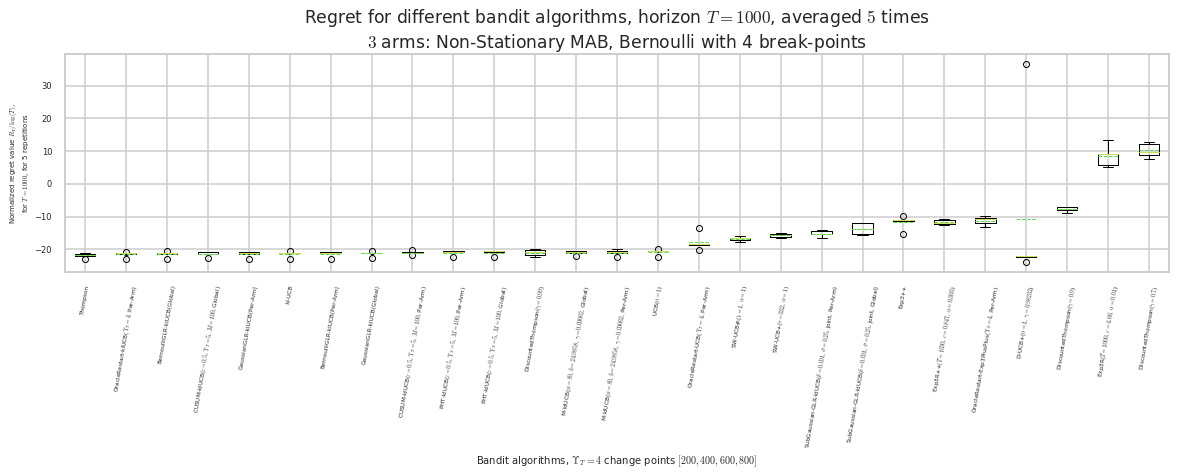


Plotting the mean and std running times ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env2-2.png' created of size '68891b', at 'Tue Dec 18 16:13:13 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__RunningTimes__env2-2.pdf' created of size '45055b', at 'Tue Dec 18 16:13:13 2018' ...


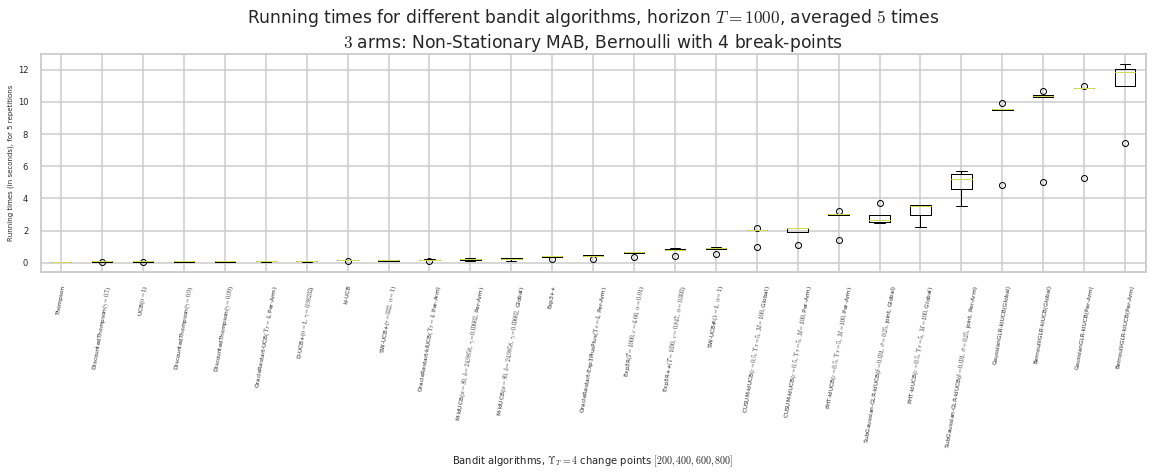


Plotting the mean and std memory consumption ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env2-2.png' created of size '68671b', at 'Tue Dec 18 16:13:15 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MemoryConsumption__env2-2.pdf' created of size '41185b', at 'Tue Dec 18 16:13:16 2018' ...


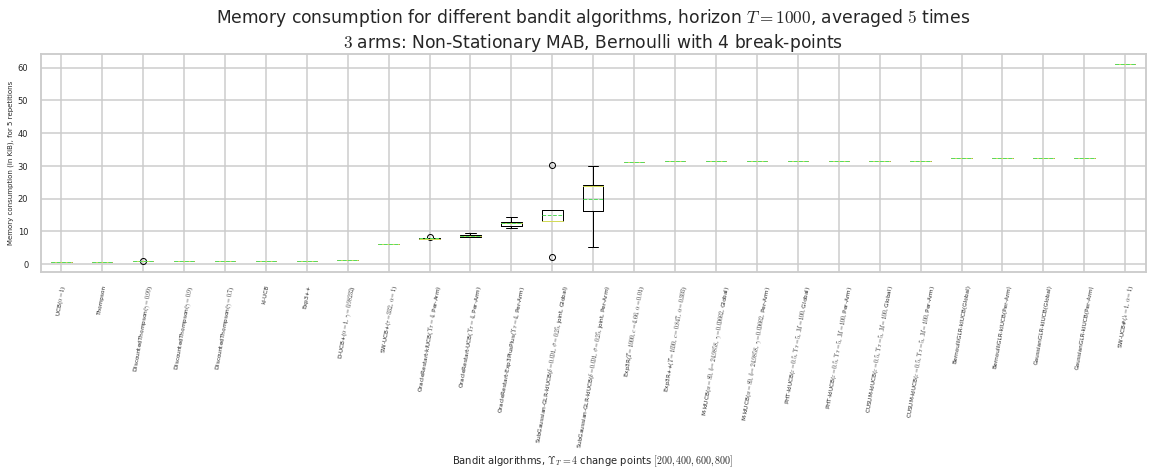


Plotting the mean regrets ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.45 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.67% ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env2-2.png' created of size '190882b', at 'Tue Dec 18 16:13:18 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__Regrets__env2-2.pdf' created of size '98568b', at 'Tue Dec 18 16:13:18 2018' ...


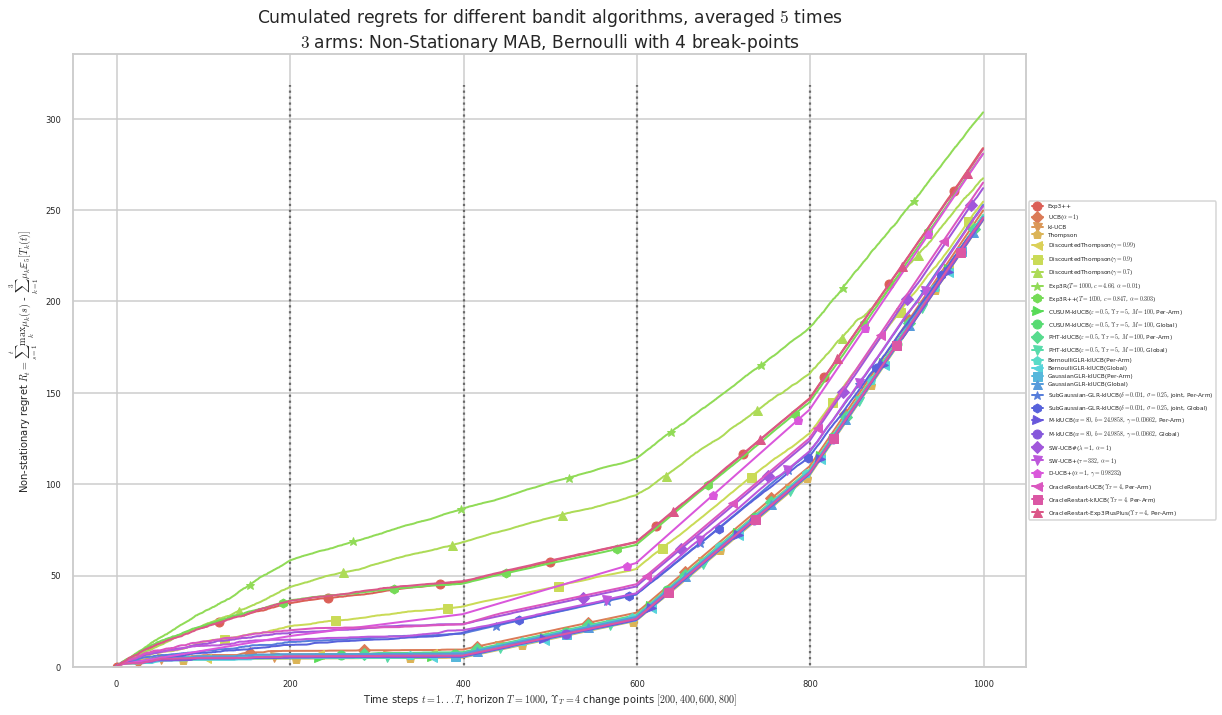


Plotting the mean rewards ...

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.45 for 1-player problem... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.67% ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env2-2.png' created of size '188094b', at 'Tue Dec 18 16:13:21 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__MeanReward__env2-2.pdf' created of size '190255b', at 'Tue Dec 18 16:13:21 2018' ...


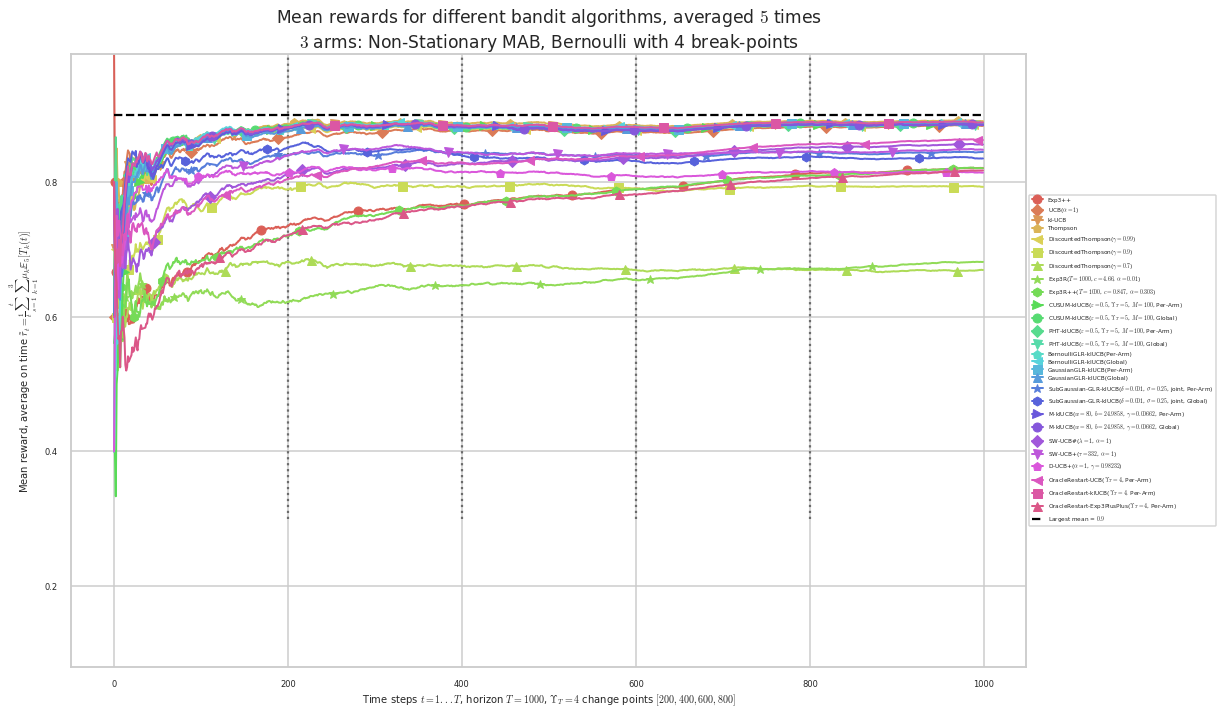


Plotting the best arm pulls ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env2-2.png' created of size '226396b', at 'Tue Dec 18 16:13:23 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__BestArmPulls__env2-2.pdf' created of size '111092b', at 'Tue Dec 18 16:13:24 2018' ...


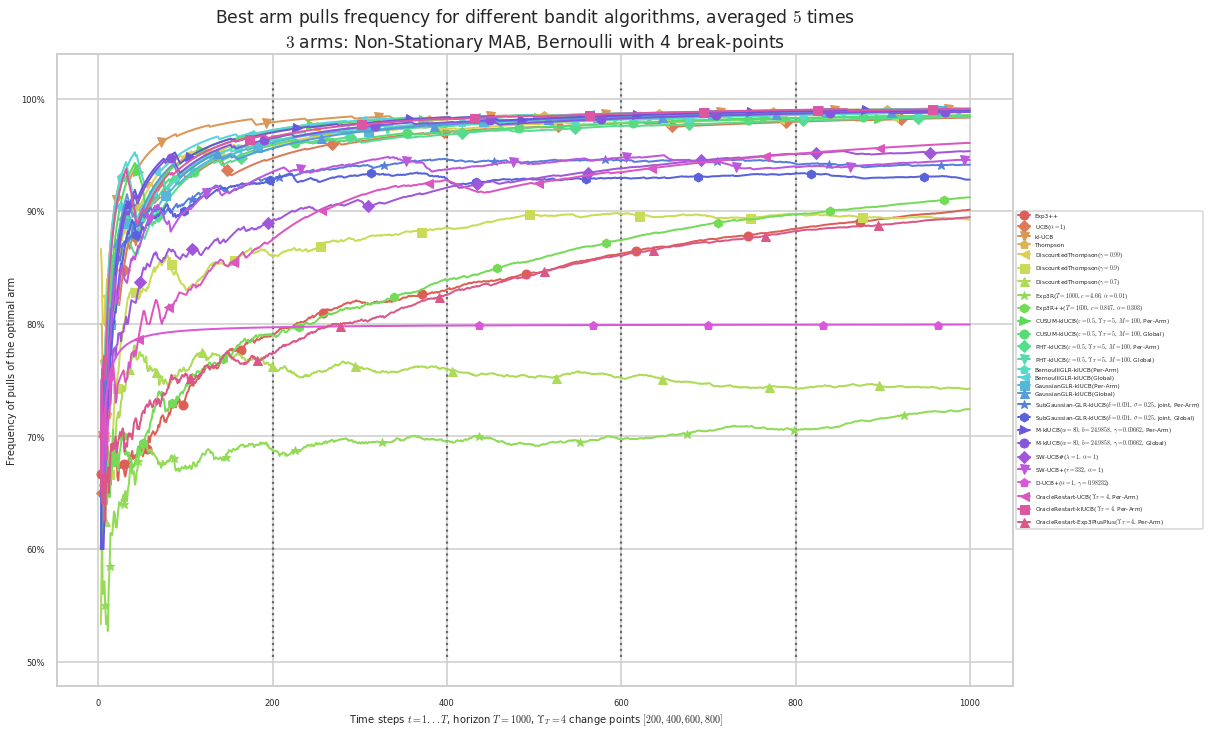


Plotting an histogram of the final regrets ...
Saving figure with format png, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.png'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.png' created of size '78618b', at 'Tue Dec 18 16:13:15 2018' ...
Saving figure with format pdf, to file 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.pdf'...
       Saved! 'plots/SP__K3_T1000_N5__27_algos/main__LastRegrets__env2-2.pdf' created of size '54828b', at 'Tue Dec 18 16:13:15 2018' ...


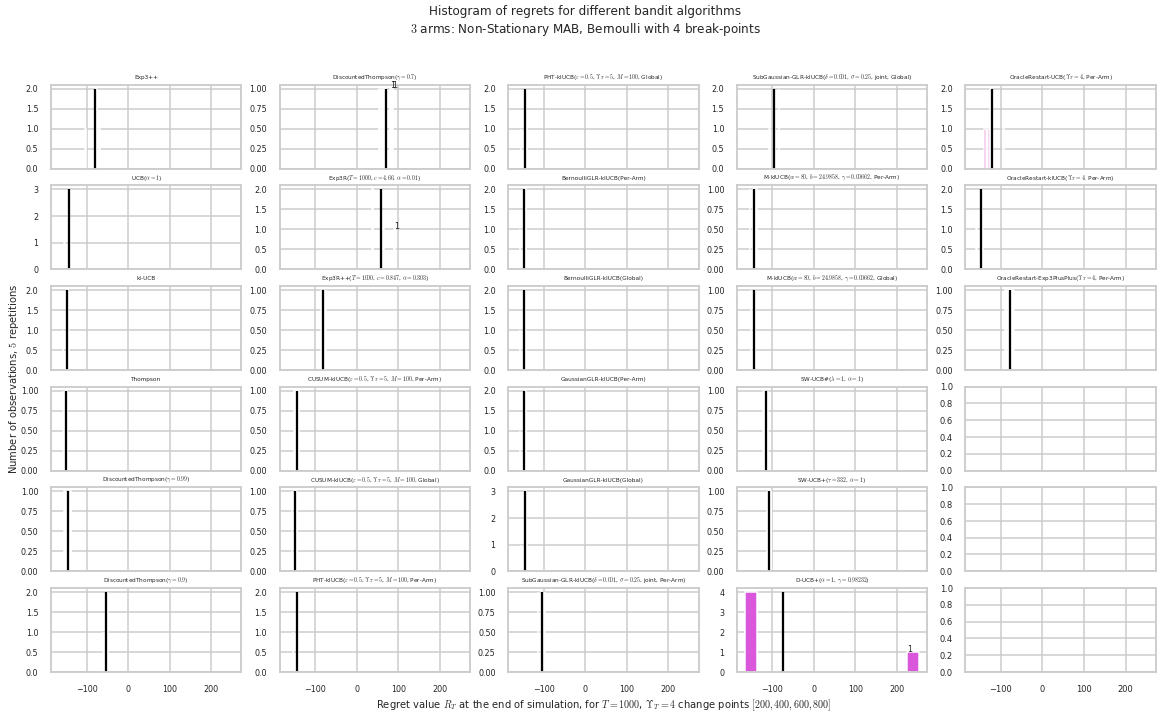

In [93]:
_ = plotAll(evaluation, envId, mainfig=mainfig)

---
> That's it for this demo!